# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
* не менее двух визуализаций должны быть интерактивными.

## Решение:

Будем визуализировать данные NASA по природным пожарам в июле-сентябре этого года. У нас есть координаты термоточек, даты их регистрации, их яркость (температура пожаров), мощность пожаров и некоторые другие по большей части технические данные.

In [ ]:
import pandas as pd

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [ ]:
fires = pd.read_csv('fire_nrt_M6_156000.csv')

С данными все хорошо, нам достался отличный датасет, абсолютно без пропусков.

In [ ]:
fires.info()

In [52]:
fires.shape

(66334, 14)

In [140]:
fires.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,37.656,-94.518,305.1,1.0,1.0,2020-07-01,425,Terra,MODIS,63,6.0NRT,294.7,4.7,N
1,36.780,-92.806,307.0,1.1,1.1,2020-07-01,425,Terra,MODIS,70,6.0NRT,293.6,7.0,N
2,36.064,-98.021,344.8,1.1,1.1,2020-07-01,425,Terra,MODIS,100,6.0NRT,299.3,58.3,N
3,36.073,-98.023,322.6,1.1,1.1,2020-07-01,425,Terra,MODIS,100,6.0NRT,298.6,20.3,N
4,36.275,-97.921,315.8,1.1,1.1,2020-07-01,425,Terra,MODIS,90,6.0NRT,298.7,12.7,N


Приводим дату к формату datetime, а градусы Кельвина в градусам Цельсия.

In [87]:
fires['acq_date'] = pd.to_datetime(fires.acq_date, format='%Y-%m-%d')

In [145]:
fires['brightness'] = fires['brightness'] - 273.15
fires['bright_t31'] = fires['bright_t31'] - 273.15

In [146]:
fires.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,37.656,-94.518,31.95,1.0,1.0,2020-07-01,425,Terra,MODIS,63,6.0NRT,21.55,4.7,N
1,36.780,-92.806,33.85,1.1,1.1,2020-07-01,425,Terra,MODIS,70,6.0NRT,20.45,7.0,N
2,36.064,-98.021,71.65,1.1,1.1,2020-07-01,425,Terra,MODIS,100,6.0NRT,26.15,58.3,N
3,36.073,-98.023,49.45,1.1,1.1,2020-07-01,425,Terra,MODIS,100,6.0NRT,25.45,20.3,N
4,36.275,-97.921,42.65,1.1,1.1,2020-07-01,425,Terra,MODIS,90,6.0NRT,25.55,12.7,N


In [185]:
fires_by_date = fires[['acq_date', 'brightness', 'confidence', 'bright_t31', 'frp', 'scan']].groupby('acq_date').agg({'brightness':'max', 'confidence': 'median', 'bright_t31': 'median', 'frp': 'sum', 'scan': 'count'})

In [186]:
fires_by_date.tail()

,brightness,confidence,bright_t31,frp,scan
acq_date,,,,,
2020-09-23,143.45,71.0,21.25,34053.4,659
2020-09-24,176.15,73.5,21.35,26233.6,418
2020-09-25,224.55,67.0,19.95,72492.0,513
2020-09-26,230.65,87.0,19.40,137695.9,628
2020-09-27,199.35,73.0,25.55,19568.6,293


<AxesSubplot:title={'center':'Количество обнаруженных термоточек'}, xlabel='Дата', ylabel='Количество термоточек'>

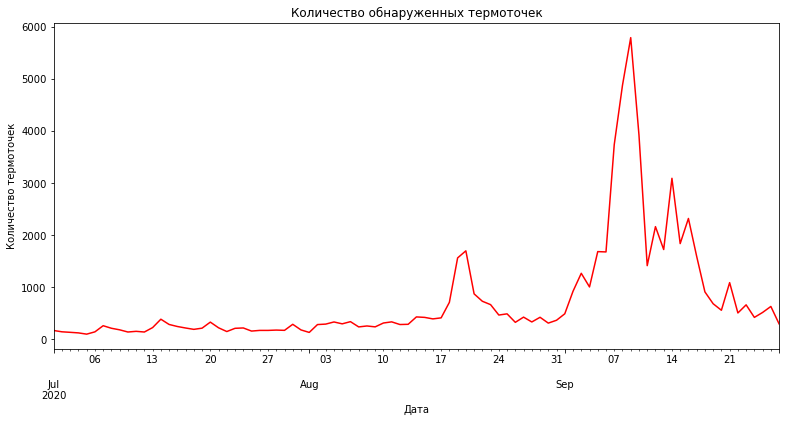

In [123]:
fires_by_date['scan'].plot(title='Количество обнаруженных термоточек', 
                                        xlabel='Дата', 
                                        ylabel='Количество термоточек',
                                        color='r')

<AxesSubplot:title={'center':'Общая мощность пожаров (МВт)'}, xlabel='Дата', ylabel='Мощность пожаров'>

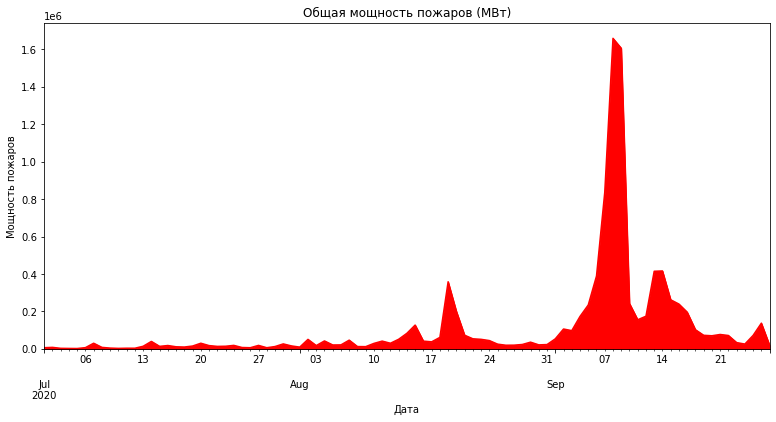

In [122]:
fires_by_date['frp'].plot(kind='area',
                          title='Общая мощность пожаров (МВт)',
                          xlabel='Дата',
                          ylabel='Мощность пожаров',
                          color='r'
                         )

**Вывод**: Мы видим вполне ожидаемый пик регистрации термоточек и мощности пожаров в сентябре, когда горела Калифорния. Пока не очень понятно, почему такая тишь в июле и августе, когда, к примеру, горели леса в Сибири и на Урале. Чуть позже мы узнаем почему. 

Теперь проверим, насколько показательны наши данные о термоточках (пожары ли все это?)

<AxesSubplot:title={'center':'Уверенность в том, что термоточка —\xa0пожар'}, ylabel='Frequency'>

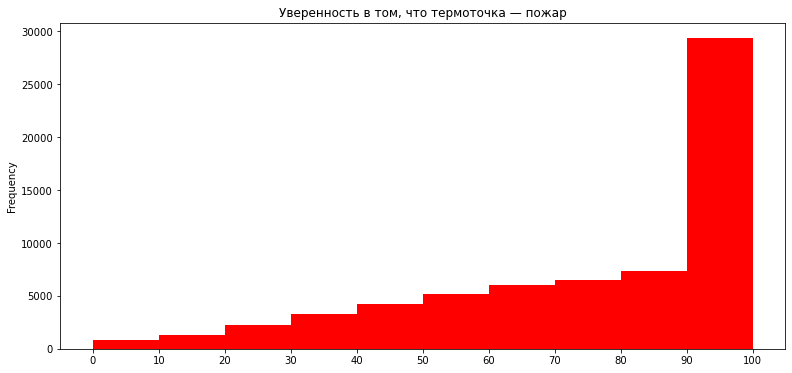

In [228]:
# Пожары ли все это?
fires.confidence.plot(kind='hist', 
                   bins=10,
                   title='Уверенность в том, что термоточка — пожар',
                   xticks=range(0, 101, 10),
                   y='Количество точек',
                   x='Уверенность',
                   color ='r')

**Вывод**: Гистограмма показывает, что подавляющее большинство термоточек в нашем наборе можно с уверенностью отнести к пожарам. То есть наши данные весьма показательны. Здесь собраны сведения о пожарах, а не обо всех подряд температурных аномалиях.

<AxesSubplot:title={'center':'Распределение пожаров по карте'}, xlabel='longitude', ylabel='latitude'>

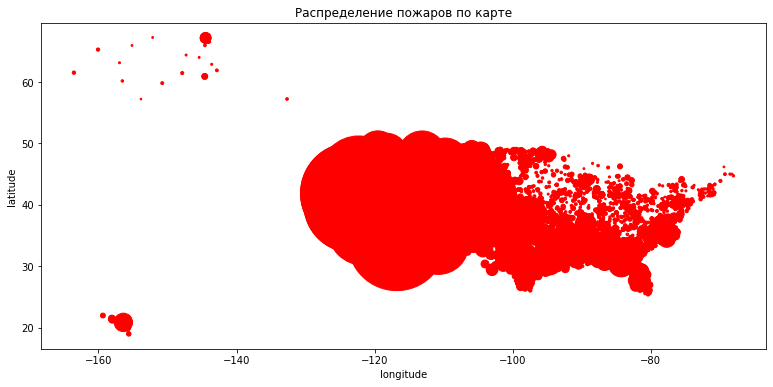

In [227]:
#Где горит
fires.plot(kind='scatter', 
        x='longitude', 
        y='latitude', 
        s='frp',
        title='Распределение пожаров по карте',
        color='r'
       )

**Вывод**: Фактически мы получили карту пожаров. И теперь мы сразу понимаем, почему на линейных графиках мы не увидели пожаров на Урале, в Сибири и на Дальнем Востоке. Несмотря на то, что в описании данных это не указано, в нашем датасете исключительно термоточки на территории США. 

Во-вторых, мы сразу можем заметить огромное пятно мощных пожаров в Калифорнии.

В-третьих, заметны возможные выбросы. Точки в левом нижнем углу — Гавайи. Точки в левом верхнем — Аляска. А вот одинокая точка неподалеку от Аляски (с координатами ~ 55,-135), кажется, находится где-то в Канаде. Проверим, так ли это.

In [136]:
fires.loc[(fires.longitude > -140) & (fires.latitude > 50)]

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
55707,57.228,-132.692,301.1,1.0,1.0,2020-09-15,2005,Terra,MODIS,20,6.0NRT,289.8,7.1,D


При проверке по карте выяснилось, что это не выброс. Точка находится на принадлежащем США узком перешейке между Канадой и Тихим океаном.

In [147]:
import seaborn as sns

[Text(0.5, 0, 'Температура'), Text(0, 0.5, 'Уверенность')]

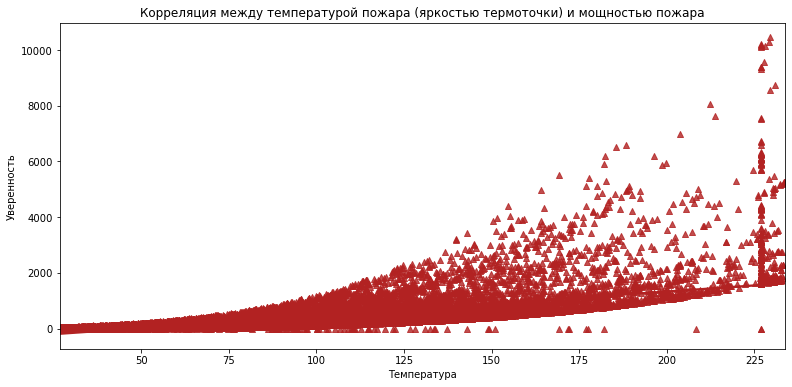

In [225]:
# Посмотрим, существует ли зависимость между температурой и мощностью пожара
ax = sns.regplot(data=fires, x='brightness', y='frp', color='firebrick', marker='^')
ax.set_title('Корреляция между температурой пожара (яркостью термоточки) и мощностью пожара')
ax.set(xlabel='Температура', ylabel='Уверенность')

**Вывод**: Зависимость, очевидно, есть. Сложно сказать, линейная ли она (больше похоже, что нелинейная), но в целом, чем больше одна величина, тем больше другая. Еще можно заметить, что есть точки, для которых мощность пожара не определена (равна нулю). Похоже, что это пропуски, которые вместо None заполнены нулями. Это нужно будет учесть при проведении расчетов.

[Text(0.5, 0, 'Температура'), Text(0, 0.5, 'Уверенность')]

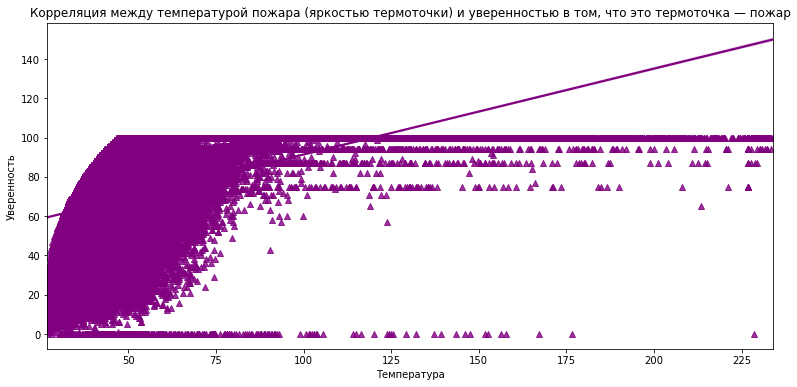

In [224]:
# Посмотрим, существует ли зависимость между температурой и уверенностью в том, что термоточка — пожар
ax = sns.regplot(data=fires, x='brightness', y='confidence', color='purple', marker='^')
ax.set_title('Корреляция между температурой пожара (яркостью термоточки) и уверенностью в том, что это термоточка — пожар')
ax.set(xlabel='Температура', ylabel='Уверенность')

**Вывод**: Главное, что мы можем увидеть на этом графике, даже не зависимость одной величины от другой, а снова пропуски. Похоже, наш набор данных не такой уж идеальный, как казалось изначально. Нулевые значения Confidence (по крайней мере часть из них) весьма вероятно — пропуски. Нужно также будет учесть это при проведении расчетов.

И вообще пришло время посмотреть, как у нас обстоят дела с выбросами

[Text(0.5, 0, 'Уверенность (в том, что это пожар)'), Text(0, 0.5, 'Спутник')]

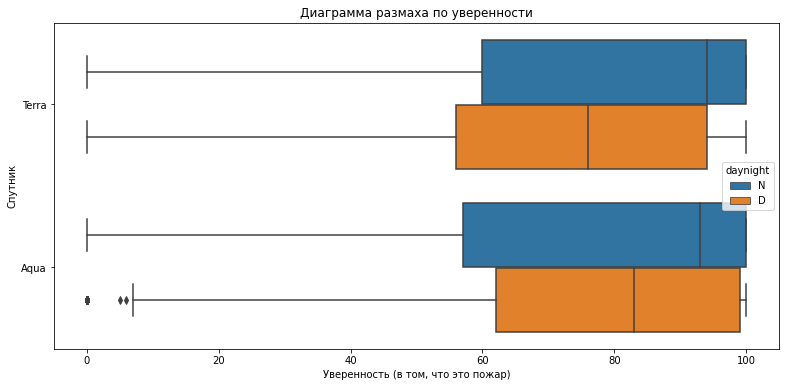

In [223]:
b_plot = sns.boxplot(x='confidence', y='satellite', hue='daynight', data=fires)
b_plot.set_title('Диаграмма размаха по уверенности')
b_plot.set(xlabel='Уверенность (в том, что это пожар)', ylabel='Спутник')

**Вывод**: о выбросах по уверенности можно сказать совсем немного, зато можно заметить, что уверенность в данных, полученных ночью, в целом заметно выше, чем в дневных. 

[Text(0.5, 0, 'Температура'), Text(0, 0.5, 'Спутник')]

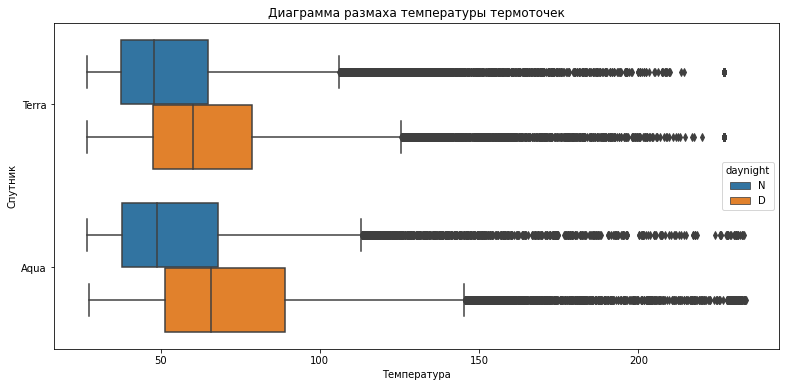

In [222]:
b_plot = sns.boxplot(x='brightness', y='satellite', hue='daynight', data=fires)
b_plot.set_title('Диаграмма размаха температуры термоточек')
b_plot.set(xlabel='Температура', ylabel='Спутник')

**Вывод**: На диаграмме можно заметить сразу несколько интересных особенностей.

Во-вервых, у нас огромное количество выбросов. Может быть, это невероятно мощные пожары. А может быть, какие-то ошибки в данных.

Во-вторых, температуры, зафиксированные спутником Aqua, заметно выше температур, зафиксированных спутником Terra. Возможно, это особенности спутников. Проверим на следующем шаге.

В-третьих, что вполне логично, дневные температуры пожаров выше ночных. К ночи пожары обычно успокаиваются, а днем разгораются с новой силой.

Выберем десять самых «жарких» дней и посмотрим, что творилось в эти дни.

In [187]:
top_days = fires_by_date.sort_values(by='brightness', ascending = False).head(10).index

[Text(0.5, 0, 'Дата'), Text(0, 0.5, 'Температура')]

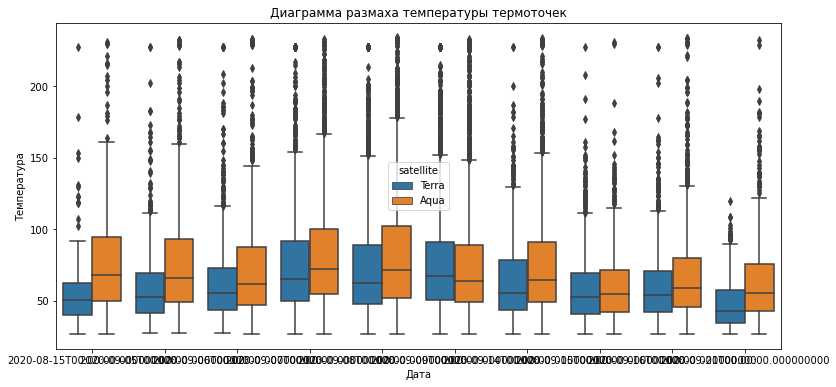

In [220]:
b_plot = sns.boxplot(x='acq_date', y='brightness', hue='satellite', data=fires[fires.acq_date.isin(top_days)])
b_plot.set_title('Диаграмма размаха температуры термоточек')
b_plot.set(xlabel='Дата', ylabel='Температура')

**Вывод**:
1. Ситуация с выбросами пока не прояснилась. Но видно, что эти выбросы не единичные, а системные — наблюдаются каждый день. Вероятно, одновременно поллыхают несколько очень мощных и множество небольших пожаров, что и приводит к такому распределению данных. Возможно, тепловая карта поможет нам разобраться.


2. Наше предположение относительно спутников подтверждается. Температуры спутника Aqua почти всегда выше температур спутника Terra. Нам нужно будет учесть это при проведении расчетов.

[Text(0.5, 0, 'Мощность пожара (мВт)')]

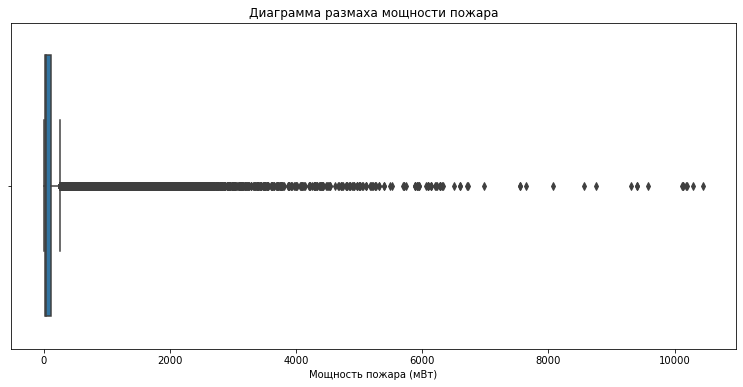

In [219]:
b_plot = sns.boxplot(x='frp', data=fires)
b_plot.set_title('Диаграмма размаха мощности пожара')
b_plot.set(xlabel='Мощность пожара (мВт)')

**Вывод**: Еще более необычный график, который отчасти подтверждает предположение, что в датафрейме собраны очень разные события, которые, вероятно, стоит обрабатывать по отдельности.

In [195]:
fires_heatmap = fires[['latitude', 'longitude', 'brightness', 'frp']].round()

[Text(0.5, 33.0, 'Долгота'), Text(96.0, 0.5, 'Широта')]

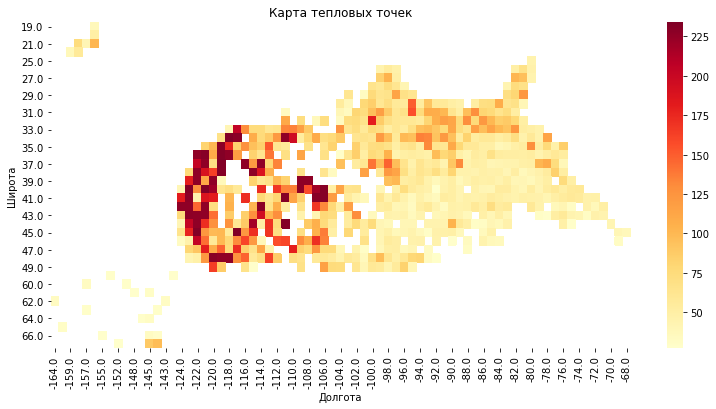

In [215]:
fire_map = sns.heatmap(fires_heatmap.pivot_table(
                        index='latitude', 
                        columns='longitude', 
                        values='brightness', 
                        aggfunc=max),
                        cmap='YlOrRd')
fire_map.set_title('Карта тепловых точек')
fire_map.set(xlabel='Долгота', ylabel='Широта')

[Text(0.5, 33.0, 'Долгота'), Text(96.0, 0.5, 'Широта')]

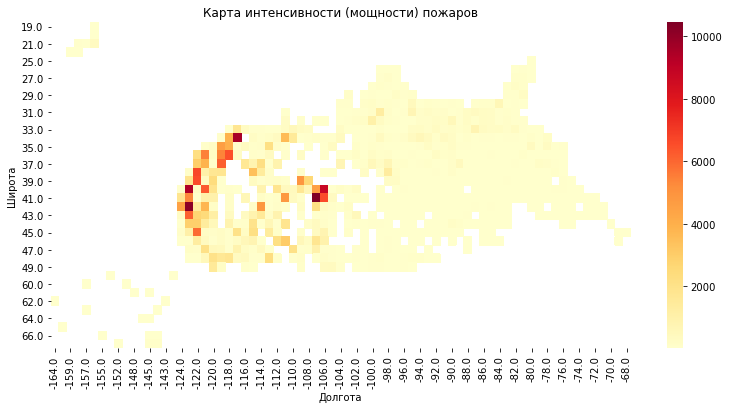

In [217]:
fire_map = sns.heatmap(fires_heatmap.pivot_table(
                        index='latitude', 
                        columns='longitude', 
                        values='frp', 
                        aggfunc=max), cmap="YlOrRd")
fire_map.set_title('Карта интенсивности (мощности) пожаров')
fire_map.set(xlabel='Долгота', ylabel='Широта')

**Вывод**: Обе тепловые карты показывают схожую картину. На западе полыхают очень мощные пожары, в то время как на востоке даже самые яркие термоточки довольно холодные. Этим, вероятно, и объясняется такое количество выбросов на Box-диаграммах. Если мы будет рассчитывать какие-либо метрики по этим данным, следует отделить мощные пожары от небольших и расчитывать метрики отдельно.